In [ ]:

import pandas as pd
data={"Employee_ID":["E001","E002","E003","E004",'E005','E006','E007',"E008","E009","E010","E011",'E012','E013','E014','E015','E016','E017','E018','E019','E020'],
"Department":["Sales","IT","HR","Sales","IT","HR","Sales","IT","HR","Sales","IT","HR","Sales","IT","HR","Sales","IT","HR","Sales","IT"],
"Performance":[88,None,75,92,68,85,None,79,90,73,86,None,95,70,82,78,89,71,87,93],
"Hours_Worked":[40,45,38,42,None,39,41,44,37,40,46,38,43,None,39,41,45,37,None,44],
"Training Hours":[5,3,None,6,4,5,3,4,None,5,2,6,7,3,5,4,None,3,5,6],
"Gender":["Male","Female","Male","Female",None,"Male","Female","Male","Female","Male","Female","Male","Female","Male",None,"Female","Male","Female","Male","Female"],
"Location":["Site_A","Site_B","Site_A","Site_C","Site_B","Site_A","Site_C","Site_B","Site_A","Site_C","Site_B","Site_A","Site_C","Site_B","Site_A","Site_C","Site_B","Site_A","Site_C","Site_B"]}
df=pd.DataFrame(data)
df.to_csv("Employee_Performance.csv",index=False)

In [ ]:
#1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất một quy trình thu thập dữ liệu cụ thể cho công ty để giảm thiểu dữ liệu thiếu trong tương lai, giải thích tại sao quy trình này phù hợp với từng phòng ban (Sales, IT, HR).
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)


Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


#đề xuất:
- Dựa trên những dữ liệu thiếu trên, quy trình mà tôi muốn đề xuất:
Bước 1: Chuẩn hóa nhập liệu:
Form điện tử bắt buộc: có thể sử dụng Google Forms thay vì Excel thủ công
Thiết lập trường bắt buộc cho các cột quan trọng như Performance , Hour_Worked, Training_Hours
Bước 2: Phân quyền và trách nhiệm rõ ràng
Mỗi phòng ban có người chịu trách nhiệm (Data Owner) kiểm tra dữ liệu trước khi gửi.

HR: Quản lý thông tin nhân sự (Gender, Training Hours).

IT: Giám sát hệ thống tự động ghi nhận giờ làm (Hours_Worked).

Sales: Báo cáo hiệu suất (Performance) định kỳ.

Bước 3: Tự động hóa thu thập dữ liệu
Kết nối hệ thống (VD: HRIS, ERP, Time Tracking Tool) để giảm thiểu nhập tay.

API đồng bộ dữ liệu giữa các phòng ban.

Bước 4: Kiểm tra và báo cáo định kỳ
Hàng tuần: IT chạy script phát hiện dữ liệu thiếu, gửi cảnh báo.

Hàng tháng: HR đối chiếu dữ liệu với payroll, đào tạo.
Có nhiều lý do tại sao phương pháp này tối ưu:
- Giúp bộ phận HR theo dõi tình hình một cách dễ dàng hơn, nhắc nhở nhân viên nhiều hơn
- Nhân viên có thể theo dõi tình hình, từ đó đưa ra hướng giải quyết đúng đắn, đảm bảo quyền lợi cho đôi bên, tránh xích mích không đáng có.

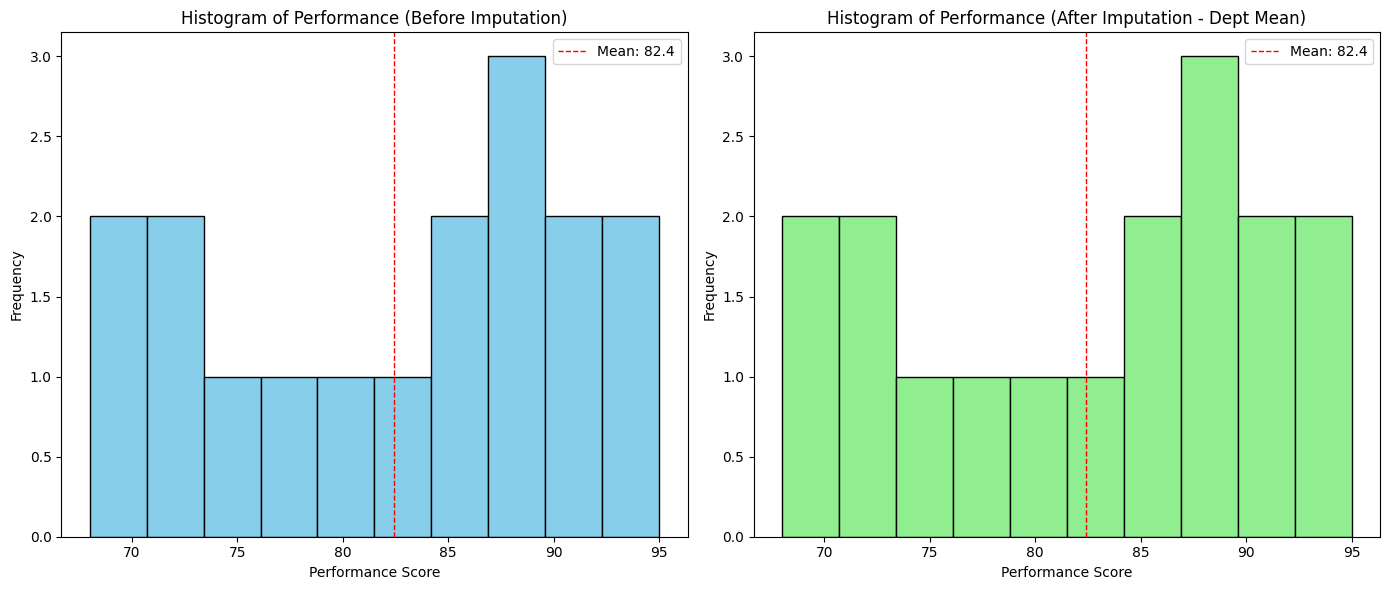

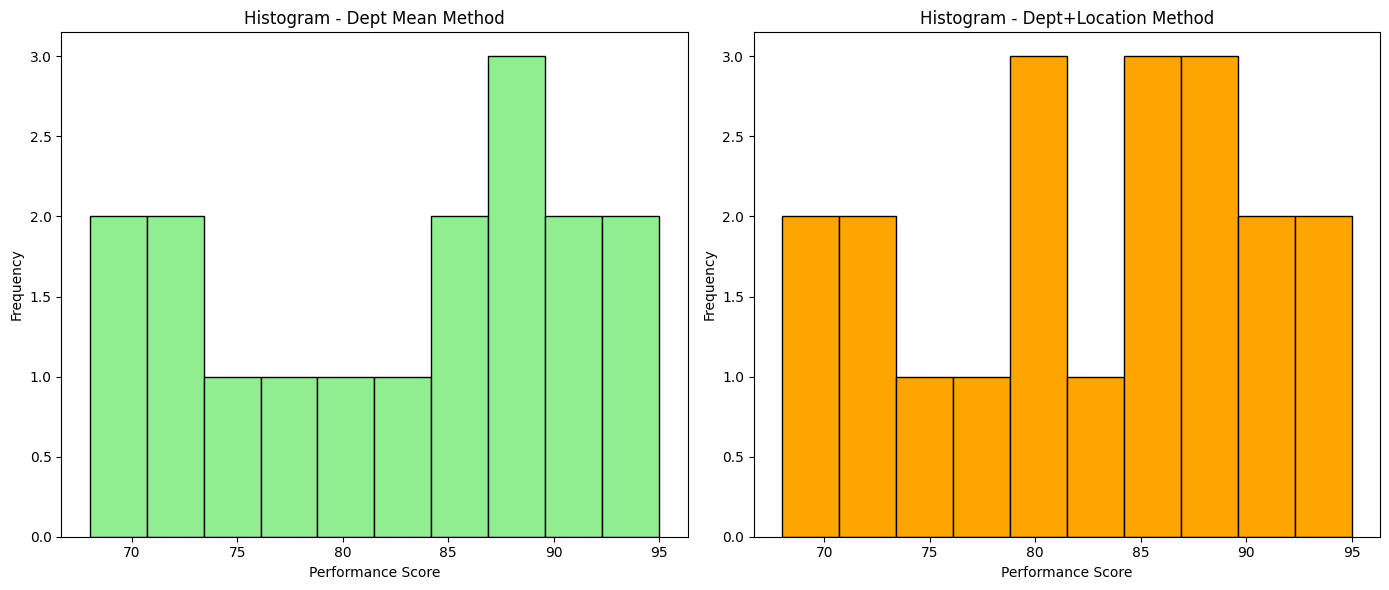

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv('Employee_Performance.csv')

# Tạo bản sao để so sánh trước/sau
df_before = df.copy()

## Phương pháp 1: Điền bằng trung bình theo Department
# Tính trung bình Performance theo từng Department
dept_means = df.groupby('Department')['Performance'].mean()

# Điền giá trị thiếu
df['Performance'] = df['Performance'].fillna(dept_means)

## Phương pháp 2 đề xuất: Điền giá trị dựa trên Location
# Có thể điền bằng trung bình Performance của từng Location
# Hoặc kết hợp cả Department và Location nếu có đủ dữ liệu

def fill_by_location_dept(df):
    # Tạo bản sao
    temp_df = df.copy()

    # Tính trung bình kết hợp Department và Location
    combined_means = temp_df.groupby(['Department', 'Location'])['Performance'].mean()

    # Điền giá trị thiếu
    for idx, row in temp_df[temp_df['Performance'].isna()].iterrows():
        dept = row['Department']
        loc = row['Location']
        if (dept, loc) in combined_means:
            temp_df.at[idx, 'Performance'] = combined_means[(dept, loc)]
        else:
            # Nếu không có kết hợp này, dùng trung bình Department
            temp_df.at[idx, 'Performance'] = dept_means[idx]

    return temp_df

# Áp dụng phương pháp đề xuất
df_after_method2 = fill_by_location_dept(df_before.copy())

## Vẽ histogram trước và sau khi điền giá trị
plt.figure(figsize=(14, 6))

# Histogram trước khi điền
plt.subplot(1, 2, 1)
plt.hist(df_before['Performance'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Performance (Before Imputation)')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.axvline(df_before['Performance'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df_before["Performance"].mean():.1f}')
plt.legend()

# Histogram sau khi điền (phương pháp 1)
plt.subplot(1, 2, 2)
plt.hist(df['Performance'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Performance (After Imputation - Dept Mean)')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.axvline(df['Performance'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["Performance"].mean():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

# Hiển thị thêm histogram cho phương pháp 2 để so sánh
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Performance'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram - Dept Mean Method')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_after_method2['Performance'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram - Dept+Location Method')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Đọc dữ liệu (giả sử đã load DataFrame df từ file CSV)
hours_worked = df['Hours_Worked'].dropna()  # Bỏ giá trị thiếu

# Tính toán các chỉ số
std_dev = np.std(hours_worked)  # Độ lệch chuẩn
median = np.median(hours_worked)  # Trung vị

print(f"Độ lệch chuẩn của Hours_Worked: {std_dev:.2f} giờ")
print(f"Trung vị của Hours_Worked: {median:.2f} giờ")

Độ lệch chuẩn của Hours_Worked: 2.87 giờ
Trung vị của Hours_Worked: 41.00 giờ


In [ ]:
import pandas as pd

# Giả sử df là DataFrame đã được làm sạch (đã điền missing values)
correlation_by_location = df.groupby('Location')[['Hours_Worked', 'Performance']].corr().iloc[0::2, -1]

# Kết quả correlation
print("Correlation giữa Hours_Worked và Performance theo Location:",correlation_by_location)

Correlation giữa Hours_Worked và Performance theo Location: Location              
Site_A    Hours_Worked    0.405432
Site_B    Hours_Worked    0.044189
Site_C    Hours_Worked    0.968719
Name: Performance, dtype: float64


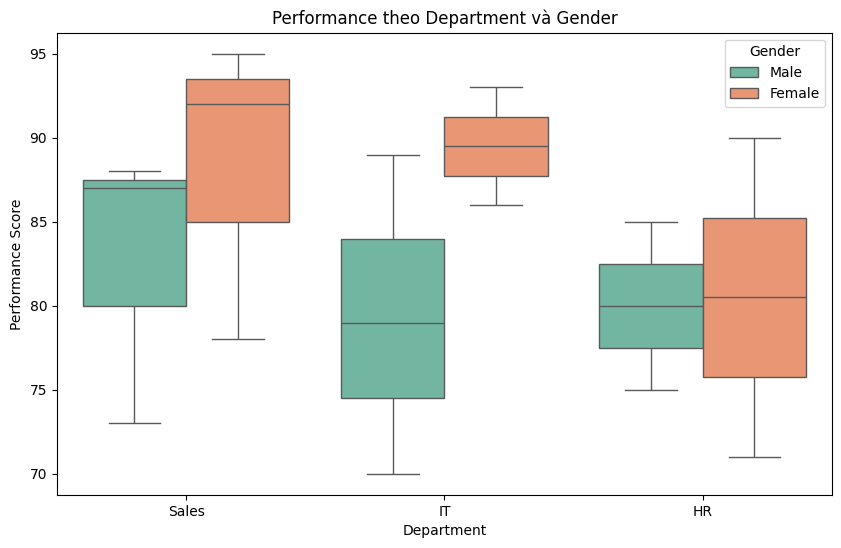

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dữ liệu (giả sử df đã được định nghĩa trước đó)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Department",
    y="Performance",
    hue="Gender",
    palette="Set2",
    showfliers=True  # Hiển thị outlier
)
plt.title("Performance theo Department và Gender")
plt.xlabel("Department")
plt.ylabel("Performance Score")
plt.legend(title="Gender")
plt.show()

In [ ]:
# Hàm xác định outlier theo IQR
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Xác định outlier cho từng nhóm Department-Gender
grouped = df.groupby(['Department', 'Gender'])
outliers_list = []

for name, group in grouped:
    outliers = detect_outliers_iqr(group, 'Performance')
    if not outliers.empty:
        outliers['Department'] = name[0]
        outliers['Gender'] = name[1]
        outliers_list.append(outliers)

# Gộp tất cả outlier vào một DataFrame
if outliers_list:
    all_outliers = pd.concat(outliers_list)
    print("Các giá trị outlier:")
    print(all_outliers[['Department', 'Gender', 'Performance']])
else:
    print("Không có outlier nào được phát hiện.")

Không có outlier nào được phát hiện.


In [ ]:
import pandas as pd

# Tạo cột Efficiency = Performance / Hours_Worked
df['Efficiency'] = df['Performance'] / df['Hours_Worked']

# Sắp xếp theo Efficiency giảm dần và chọn nhân viên đứng đầu
top_employee = df.sort_values('Efficiency', ascending=False).iloc[0]

print("Nhân viên có hiệu suất cao nhất:")
print(f"ID: {top_employee['Employee_ID']}, Department: {top_employee['Department']}")
print(f"Efficiency: {top_employee['Efficiency']:.2f} (Performance/Hours Worked)")

Nhân viên có hiệu suất cao nhất:
ID: E009, Department: HR
Efficiency: 2.43 (Performance/Hours Worked)


In [ ]:
import pandas as pd

# Điền giá trị thiếu trong cột Gender bằng Mode (giá trị phổ biến nhất của mỗi Department)
df['Gender'] = df.groupby('Department')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))

# Tính tỷ lệ nhân viên nữ (Female) theo từng Department
female_ratio = df[df['Gender'] == 'Female'].groupby('Department').size() / df.groupby('Department').size() * 100

print("Tỷ lệ nhân viên nữ theo từng Department (%):")
print(female_ratio.round(2))

Tỷ lệ nhân viên nữ theo từng Department (%):
Department
HR       33.33
IT       57.14
Sales    57.14
dtype: float64


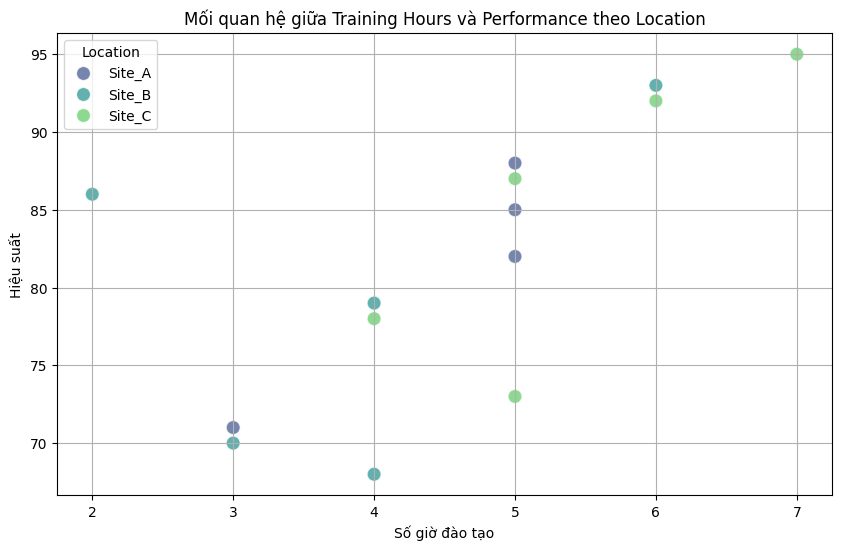

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Training Hours",
    y="Performance",
    hue="Location",
    palette="viridis",
    s=100,  # Kích thước điểm
    alpha=0.7  # Độ trong suốt
)
plt.title("Mối quan hệ giữa Training Hours và Performance theo Location")
plt.xlabel("Số giờ đào tạo")
plt.ylabel("Hiệu suất")
plt.grid(True)
plt.legend(title="Location")
plt.show()

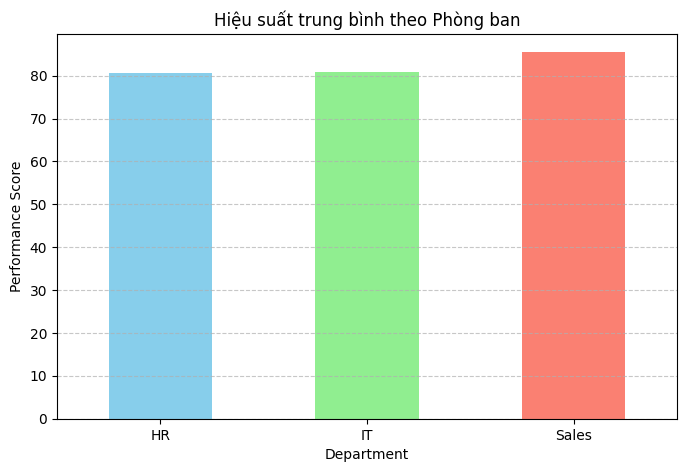

Hiệu suất trung bình:
Department
HR       80.60
IT       80.83
Sales    85.50
Name: Performance, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df đã được điền dữ liệu thiếu (ví dụ: Performance thiếu điền bằng trung bình Department)
department_avg = df.groupby('Department')['Performance'].mean().sort_values()

# Vẽ Bar Chart
plt.figure(figsize=(8, 5))
department_avg.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Hiệu suất trung bình theo Phòng ban')
plt.xlabel('Department')
plt.ylabel('Performance Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Hiệu suất trung bình:")
print(department_avg.round(2))

In [ ]:
high_performers = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
print(high_performers)

  Employee_ID Department  Performance  Hours_Worked  Training Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Efficiency  
8   Site_A    2.432432  


In [ ]:
from scipy.stats import skew

skewness = skew(df['Performance'].dropna())
print(skewness)

-0.2608793927918022
